In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import block_diag
import pandas as pd


In [10]:
# カルマンフィルタの初期設定
def kalman_filter(A, H, Q, R, x0, P0, measurements):
    n = len(x0)
    x_hat = x0
    P = P0

    estimates = []
    for measurement in measurements:
        # 予測ステップ
        x_hat_minus = A @ x_hat
        P_minus = A @ P @ A.T + Q

        # 更新ステップ
        K = P_minus @ H.T @ np.linalg.inv(H @ P_minus @ H.T + R)
        x_hat = x_hat_minus + K @ (measurement - H @ x_hat_minus)
        P = (np.eye(n) - K @ H) @ P_minus

        estimates.append(x_hat)

    return np.array(estimates)

# 加速度データの読み込み
file_path = "./logs/tokyo/"
df = pd.read_csv(
    f"{file_path}Accelerometer.csv",
    header=0,
    names=("time", "x", "y", "z")
)

data = df.values

# カルマンフィルタのパラメータ
dt = 1.0  # サンプリング間隔（秒）
A = np.array([[1, dt, 0, 0],
              [0, 1, 0, 0],
              [0, 0, 1, dt],
              [0, 0, 0, 1]])  # 状態遷移行列
H = np.array([[1, 0, 0, 0],
              [0, 0, 1, 0]])  # 観測行列
Q = 0.01 * np.eye(4)  # プロセスノイズ共分散行列
R = 0.1 * np.eye(2)  # 観測ノイズ共分散行列

# 初期状態と共分散行列
x0 = np.array([0, 0, 0, 0])
P0 = np.eye(4)

# カルマンフィルタを適用
estimates = kalman_filter(A, H, Q, R, x0, P0, data[:, 1:3])


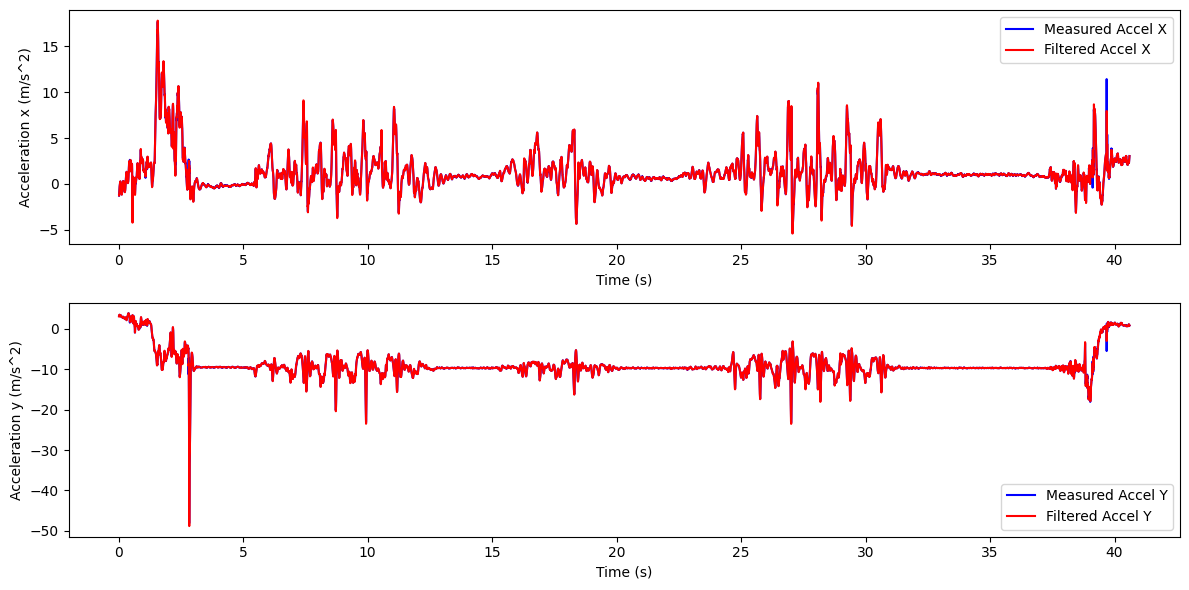

In [11]:
# グラフをプロット
plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(data[:, 0], data[:, 1], label='Measured Accel X', color='b')
plt.plot(data[:, 0], estimates[:, 0], label='Filtered Accel X', color='r')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration x (m/s^2)')
plt.legend()

plt.subplot(212)
plt.plot(data[:, 0], data[:, 2], label='Measured Accel Y', color='b')
plt.plot(data[:, 0], estimates[:, 2], label='Filtered Accel Y', color='r')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration y (m/s^2)')
plt.legend()

plt.tight_layout()
plt.show()
